In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, FuncFormatter

pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:,.4f}'.format

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.style.use("fivethirtyeight")

# Makes graphs crisp. Only use if you don't have a lot of points/lines on your graph.
%config InlineBackend.figure_formats = ['svg', 'retina'] # use svg, then retina if svg is not supported

In [2]:
helper_dir = '../helper'

%run {helper_dir}/defillama.py
%run {helper_dir}/plot.py

In [3]:
obj = DefiLlama()

## Get historical DeFi TVL on all chains

In [4]:
df = obj.get_defi_hist_tvl()
df.tail()

,tvl
date,
2022-09-20,"73,692,392,724.4210"
2022-09-21,"73,615,742,888.1170"
2022-09-22,"71,652,534,477.3334"
2022-09-23,"75,140,876,286.5995"
2022-09-24,"75,142,628,847.9541"


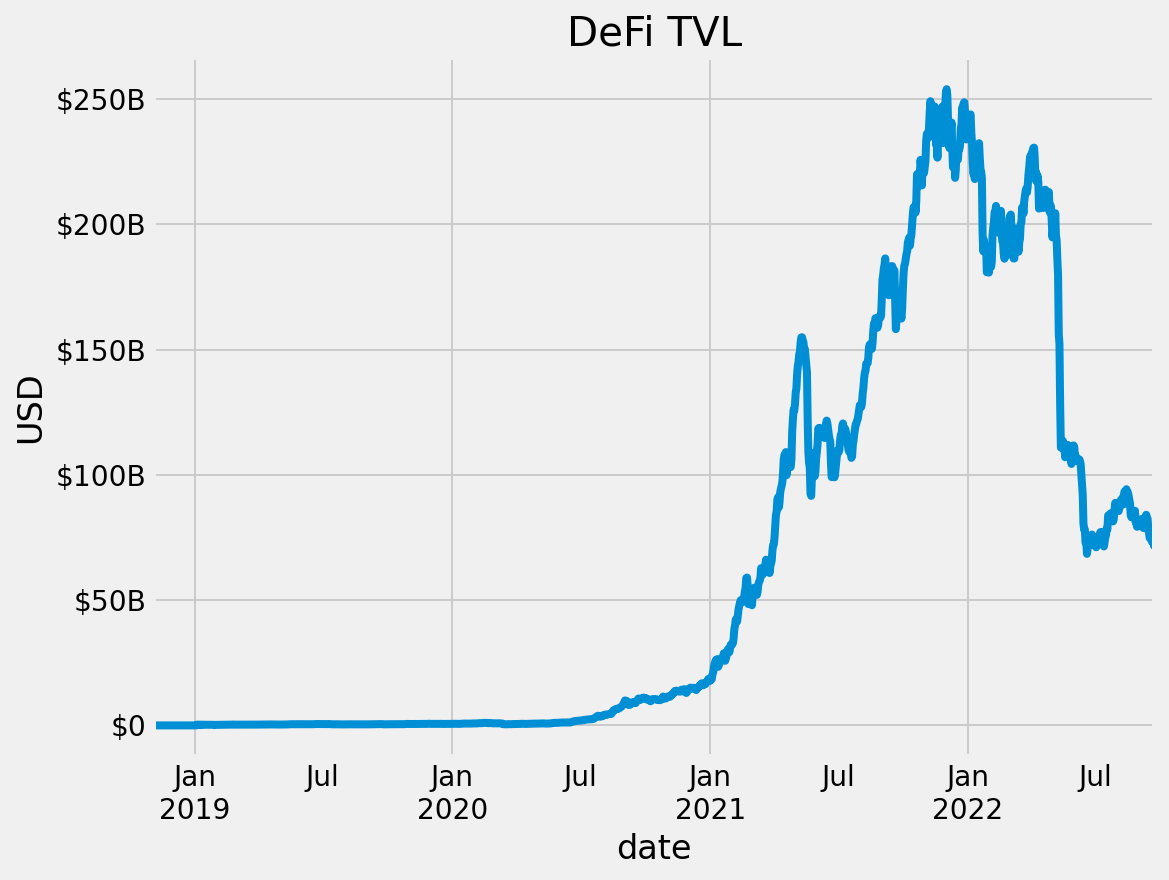

In [5]:
ax = df.tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=0))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("DeFi TVL");

## Get historical TVL of a chain

In [6]:
df = obj.get_chain_hist_tvl('Arbitrum')
df.tail()

,tvl
date,
2022-09-20,"985,035,717.5937"
2022-09-21,"972,939,784.0503"
2022-09-22,"956,964,038.4724"
2022-09-23,"1,010,291,357.7027"
2022-09-24,"1,010,297,890.2805"


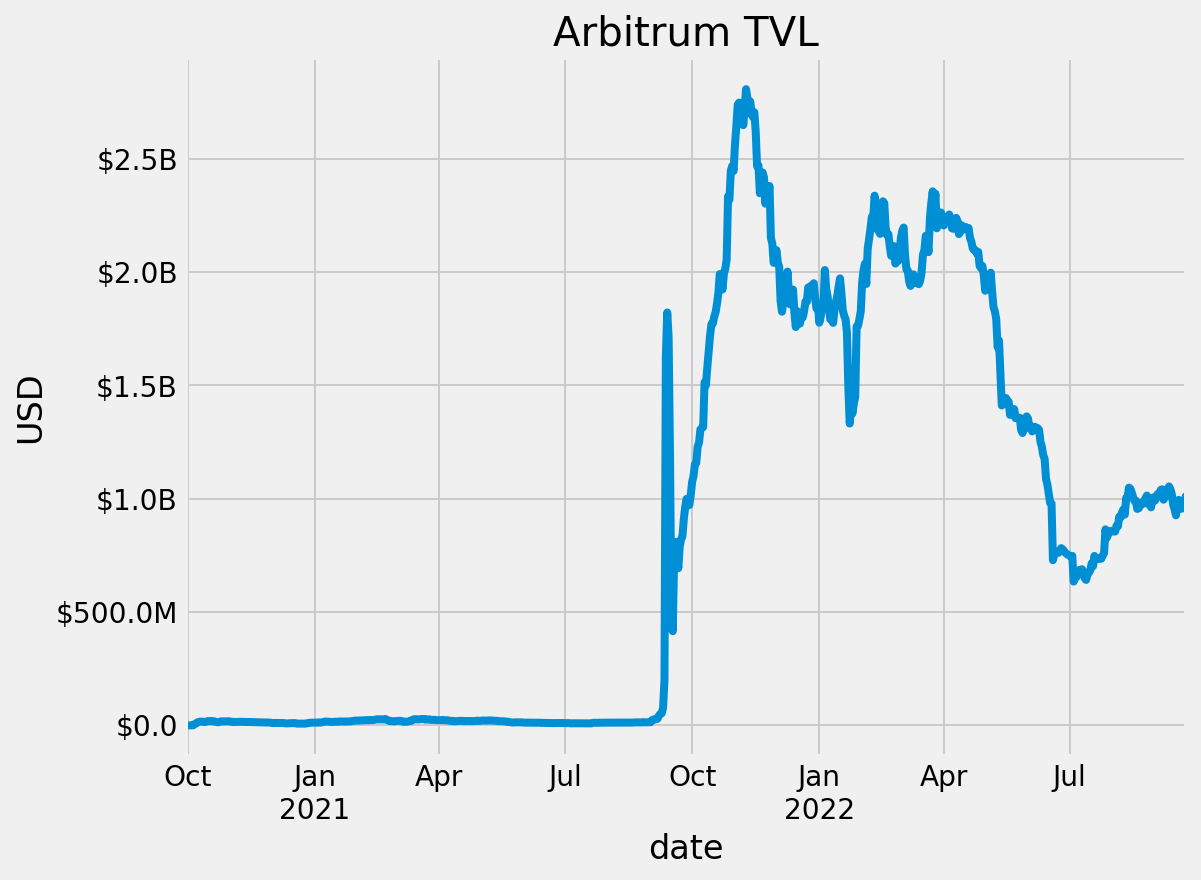

In [7]:
ax = df.tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=1))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("Arbitrum TVL");

## Get current TVL of all chains

In [17]:
df = obj.get_chains_curr_tvl()

# print top 20 chains by tvl
df = df.sort_values('tvl', ascending=False, ignore_index=True)
df.head(20)

,chain,token,tvl
0,Ethereum,ETH,"48,490,958,005.6330"
1,Binance,BNB,"6,549,218,719.7007"
2,Tron,TRON,"5,409,511,217.8288"
3,Solana,SOL,"2,044,366,623.3425"
4,Avalanche,AVAX,"1,952,895,014.9028"
5,Polygon,MATIC,"1,454,131,947.9815"
6,Arbitrum,None,"1,010,297,890.2805"
7,Optimism,OP,"930,075,955.8677"
8,Cronos,CRO,"777,014,143.1599"
9,Fantom,FTM,"633,230,453.1625"


## Get current TVL of a protocol

In [18]:
obj.get_protocol_curr_tvl('gmx')

430784199.801258

In [22]:
obj.get_protocol_curr_tvl('premia')

7375730.520300225

In [25]:
# but it doesn't always work, for example, can't pull AAVE
obj.get_protocol_curr_tvl('aave')

{'message': 'Protocol is not in our database'}

In [26]:
# Remark: this is no issue since we can get current TVL of a protocol using another method. See next section.

## Get current TVL of a protocol by chain

In [29]:
df = obj.get_protocol_curr_tvl_by_chain('gmx')
df

,tvl
Avalanche,"64,617,035.2959"
Avalanche-staking,"16,111,784.2579"
Arbitrum-staking,"261,753,553.4587"
Arbitrum,"366,167,164.5053"


In [44]:
# the current TVL can be obtained by summing the non-staking values
abs(df[~df.index.str.contains('staking')].sum() - obj.get_protocol_curr_tvl('gmx')) < 0.1

tvl    True
dtype: bool

In [50]:
df = obj.get_protocol_curr_tvl_by_chain('premia')
df

,tvl
Optimism,"1,193,447.7592"
Binance,"9,372.7080"
Ethereum,"1,837,306.4078"
Ethereum-staking,"6,258,306.6140"
Arbitrum,"3,233,796.3974"
Fantom,"1,101,807.2479"


In [51]:
# the current TVL can be obtained by summing the non-staking values
abs(df[~df.index.str.contains('staking')].sum() - obj.get_protocol_curr_tvl('premia')) < 0.1

tvl    True
dtype: bool

In [52]:
# let's now get AAVE's current TVL
df = obj.get_protocol_curr_tvl_by_chain('aave')
df[~df.index.str.contains('staking')].sum()

tvl   12,485,469,833.2422
dtype: float64

## Get historical TVL of a protocol by chain

In [53]:
dd = obj.get_protocol_hist_tvl_by_chain('gmx')

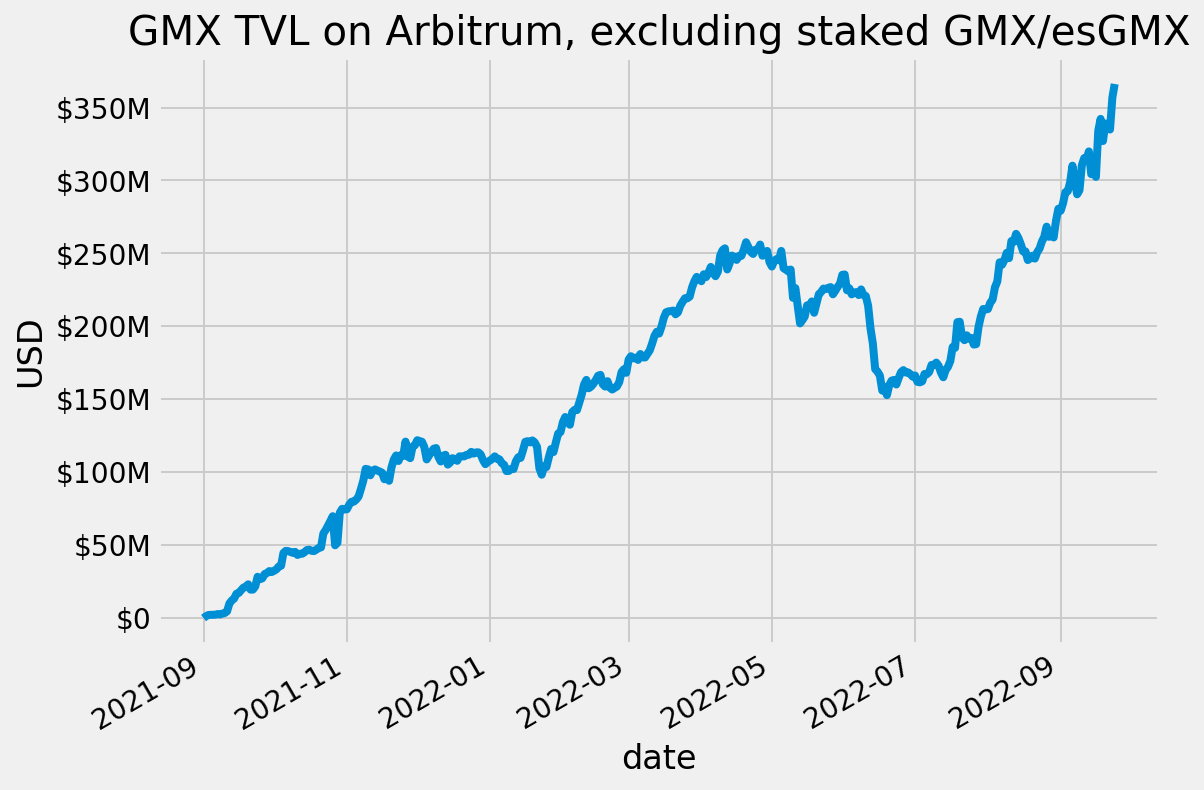

In [60]:
ax = dd['Arbitrum'].tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=0))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("GMX TVL on Arbitrum, excluding staked GMX/esGMX");

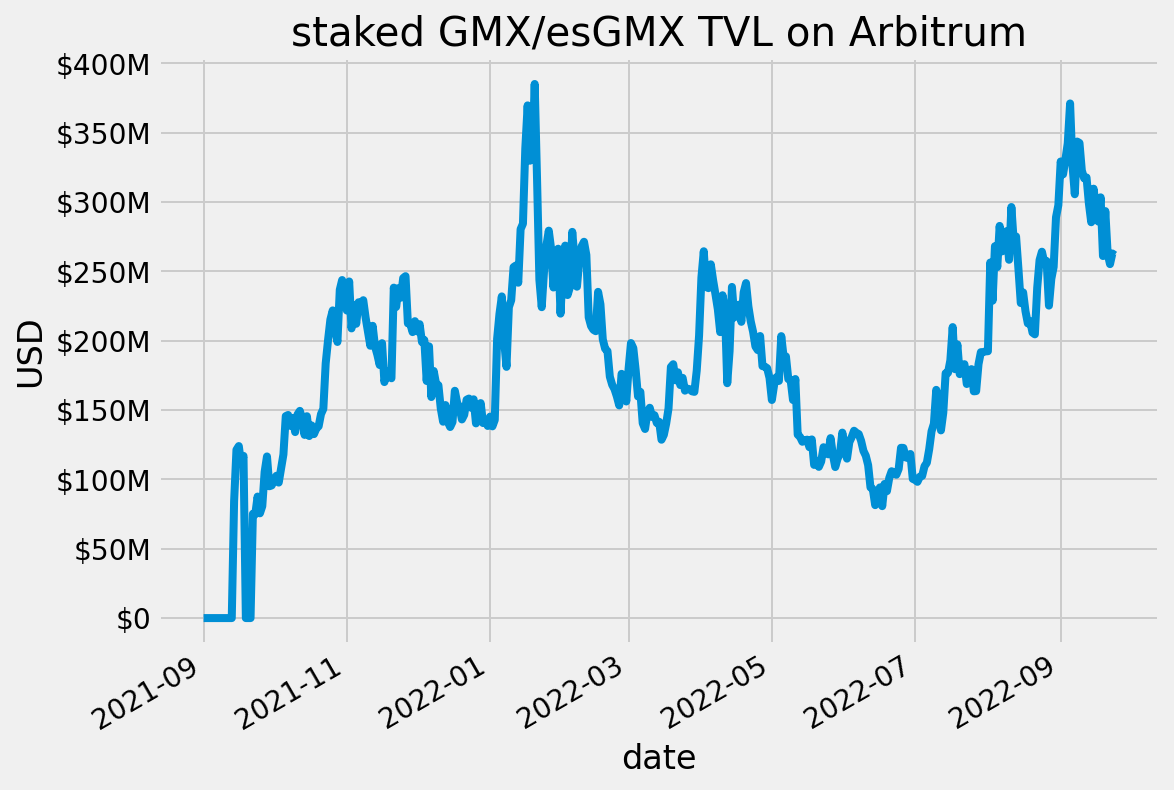

In [61]:
ax = dd['Arbitrum-staking'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("staked GMX/esGMX TVL on Arbitrum");

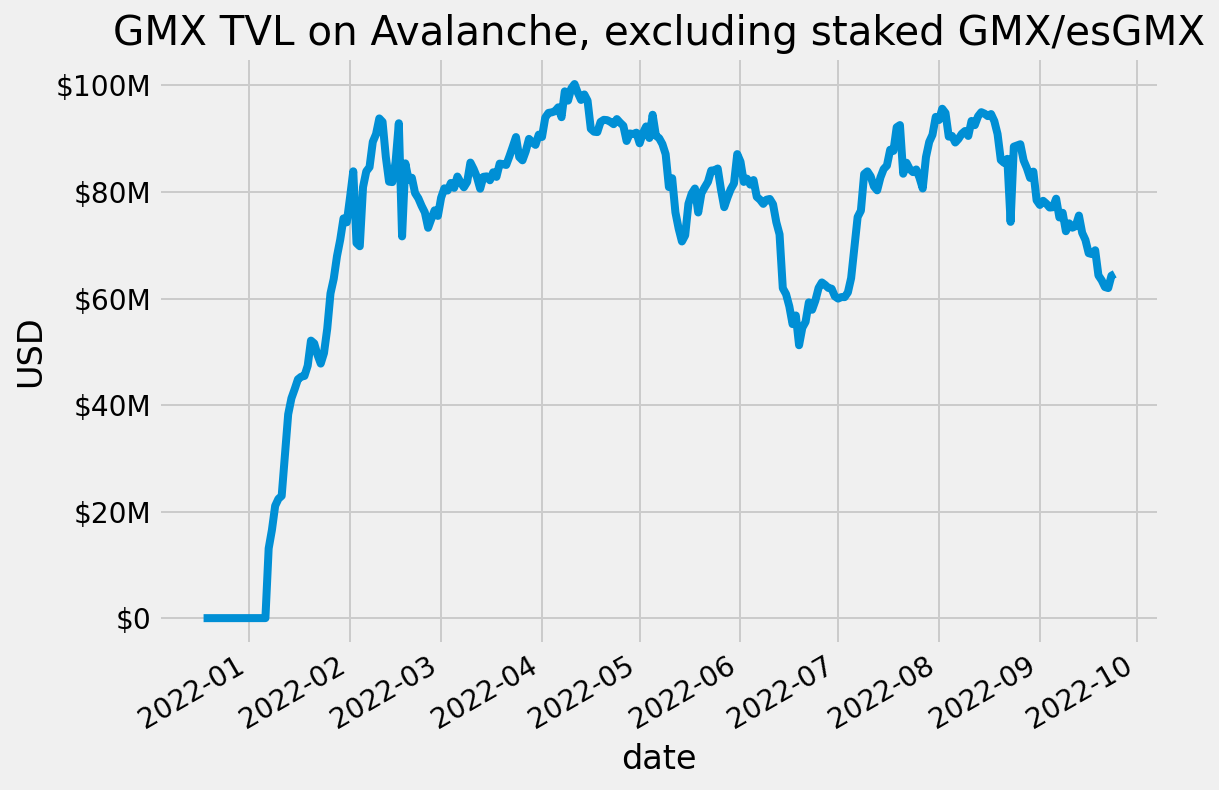

In [62]:
ax = dd['Avalanche'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("GMX TVL on Avalanche, excluding staked GMX/esGMX");

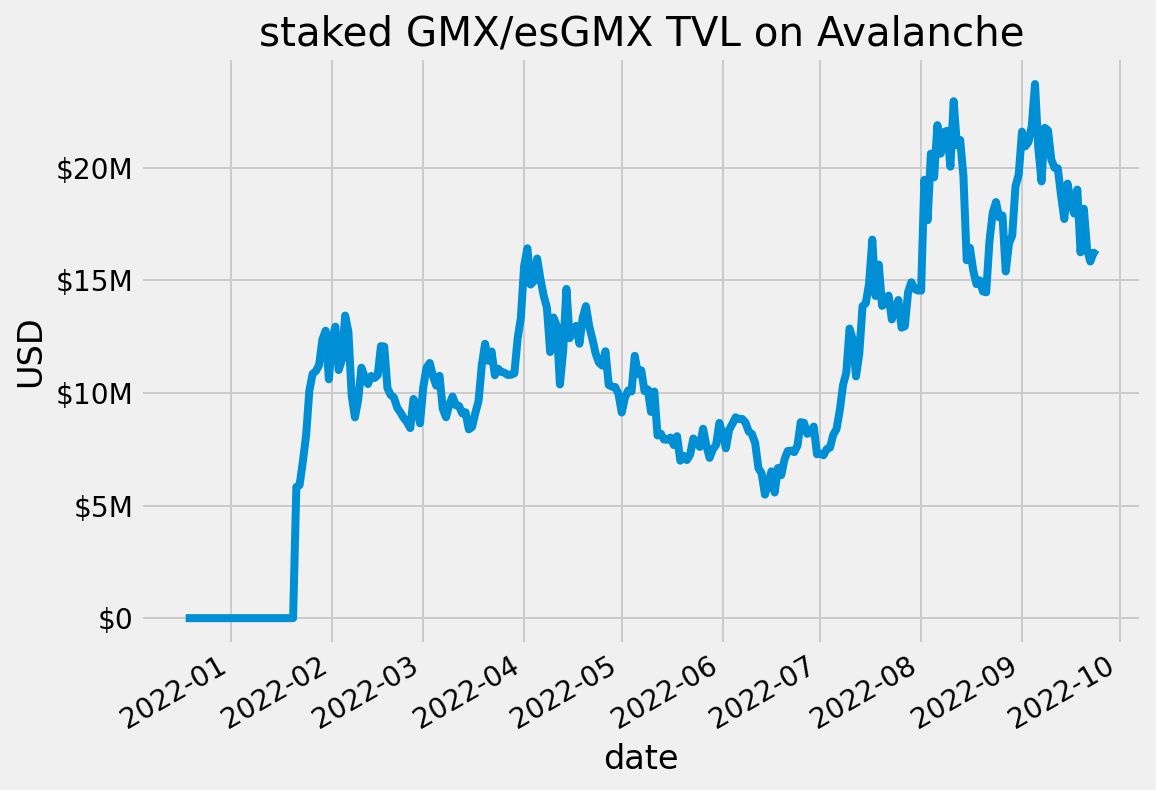

In [63]:
ax = dd['Avalanche-staking'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("staked GMX/esGMX TVL on Avalanche");

## Get fundamentals for all protocols

In [65]:
df = obj.get_protocols_fundamentals()
df = df.sort_values('tvl', ascending=False, ignore_index=True)
df.head(10)

,name,symbol,chain,category,chains,tvl,change_1d,change_7d,fdv,mcap,forked_from
0,MakerDAO,MKR,Ethereum,CDP,[Ethereum],"7,284,021,364.9758",-0.1975,-2.0139,"637,949,522.0000","571,801,949.0000",NaN
1,Polygon Bridge & Staking,MATIC,Polygon,Chain,[Polygon],"6,495,249,360.4259",-1.5466,-8.3016,"7,693,204,297.0000","5,724,897,306.0000",NaN
2,Lido,LDO,Multi-Chain,Liquid Staking,"[Ethereum, Solana, Moonbeam, Moonriver, Terra]","5,926,674,373.5086",-0.4730,-7.5072,"1,778,512,030.0000","1,138,858,714.0000",NaN
3,Curve,CRV,Multi-Chain,Dexes,"[Ethereum, xDai, Polygon, Arbitrum, Avalanche,...","5,668,885,977.2132",0.9778,9.9326,"2,944,138,510.0000","349,369,770.0000",NaN
4,Uniswap,UNI,Multi-Chain,Dexes,"[Ethereum, Arbitrum, Polygon, Optimism, Celo]","5,159,289,788.3311",0.4707,0.5662,"5,953,066,373.0000","4,487,222,998.0000",NaN
5,WBTC,WBTC,Ethereum,Bridge,[Ethereum],"4,685,929,797.4837",-0.7194,-5.2003,"4,708,615,924.0000","4,708,615,924.0000",NaN
6,AAVE V2,AAVE,Multi-Chain,Lending,"[Ethereum, Polygon, Avalanche]","4,390,935,565.2764",0.0646,-5.0321,"1,224,039,796.0000","1,078,752,610.0000",NaN
7,Convex Finance,CVX,Ethereum,Yield,[Ethereum],"3,942,856,473.5587",0.3465,6.7597,"470,546,700.0000","324,600,194.0000",NaN
8,JustLend,JST,Tron,Lending,[Tron],"3,172,911,830.8689",-1.4312,-2.9065,"245,994,797.0000","221,198,521.0000",NaN
9,PancakeSwap,CAKE,Binance,Dexes,[Binance],"2,905,736,226.8455",0.1419,0.2463,"3,379,387,847.0000","644,282,748.0000",[Uniswap]


In [69]:
# find the 5 protocols with the biggest % jump in TVL in last 7 days
df.sort_values('change_7d', ascending=False, ignore_index=True).head(5)

,name,symbol,chain,category,chains,tvl,change_1d,change_7d,fdv,mcap,forked_from
0,Temple DAO,TEMPLE,Ethereum,Reserve Currency,[Ethereum],"98,073,592.4262",0.0852,"3,650.2814","214,113,008.0000","88,635,676.0000",NaN
1,BoneSwap,BONE,Dogechain,Farm,[Dogechain],"3,311.8857",-76.0651,965.9638,NaN,NaN,[SushiSwap]
2,OGX,OGX,EOS,Synthetics,[EOS],"1,106,491.4870",-7.9446,729.4281,NaN,0.0000,[]
3,Sablier Finance,-,Ethereum,Payments,[Ethereum],"647,120,587.5385",-22.7420,605.2879,NaN,NaN,NaN
4,Concave,CNV,Ethereum,Services,[Ethereum],"3,349,011.4436",0.0723,549.6860,NaN,"1,155,948.0000",[]


In [72]:
# derive other metrics
ha = (df.loc[:, ['name', 'category', 'tvl', 'fdv', 'mcap']]
        .assign(mcap_per_tvl = df.mcap / df.tvl, fdv_per_tvl = df.fdv / df.tvl)
     )
ha          

,name,category,tvl,fdv,mcap,mcap_per_tvl,fdv_per_tvl
0,MakerDAO,CDP,"7,284,021,364.9758","637,949,522.0000","571,801,949.0000",0.0785,0.0876
1,Polygon Bridge & Staking,Chain,"6,495,249,360.4259","7,693,204,297.0000","5,724,897,306.0000",0.8814,1.1844
2,Lido,Liquid Staking,"5,926,674,373.5086","1,778,512,030.0000","1,138,858,714.0000",0.1922,0.3001
3,Curve,Dexes,"5,668,885,977.2132","2,944,138,510.0000","349,369,770.0000",0.0616,0.5194
4,Uniswap,Dexes,"5,159,289,788.3311","5,953,066,373.0000","4,487,222,998.0000",0.8697,1.1539
...,...,...,...,...,...,...,...
1942,Xenophon,Reserve Currency,0.0000,NaN,NaN,NaN,NaN
1943,Whale Loans,Reserve Currency,0.0000,"35,000.0000",0.0000,NaN,inf
1944,Rarify,Yield,0.0000,NaN,NaN,NaN,NaN
1945,Galatea Cash,Algo-Stables,0.0000,NaN,NaN,NaN,NaN


In [75]:
# aggregate by category
ha.groupby('category')[['tvl', 'fdv', 'mcap']].sum()

,tvl,fdv,mcap
category,,,
Algo-Stables,"1,293,456,726.8935","41,954,992,318,197.7188","694,278,898.4800"
Bridge,"10,792,117,747.4702","5,884,544,712.0000","5,264,649,187.0000"
CDP,"9,820,692,764.0651","3,092,167,918.0000","1,238,646,613.0000"
Chain,"6,992,966,081.9341","8,533,320,429.0000","6,412,875,853.0000"
Cross Chain,"970,745,242.9105","1,243,880,191.0000","478,289,845.0000"
Derivatives,"1,185,540,554.6785","11,948,544,149,602.0000","855,922,736.0000"
Dexes,"23,517,959,321.0856","38,838,793,741.1600","14,251,091,504.6300"
Farm,"46,337,339.0347","21,347,670.8400","3,777,388.0000"
Gaming,"12,323,508.9283","3,847,335,754.0000","1,510,777,645.0000"
